# Interação interespecífica entre Gavião Cobra e Roedor

Em uma interação de uma espécie $P$ com outras duas espécies $A$ e $B$, vamos considerar um sistema de equações de diferenças do tipo

$$
P_{n+1}=P_n\left[1+\lambda_P\left(1-\dfrac{P_n}{K}\right)\eta+\gamma_{a,p}A_n+\gamma_{b,p}B_n\right],
$$
onde:

- $\lambda_P$ é a taxa de crescimento da espécie $P$
- $K$ é a capacidade de suporte do ambiente para espécie $P$
- $\gamma_{i,j}$ indica o quanto a espécie $I$ beneficia/prejudica a espécie $J$
- $\eta$ é uma variável binária assumindo valor $1$ se for considerado Vershulst e $0$ caso contrário

No código a seguir temos uma função que retorna população da espécie $P$ interagindo com as espécies $A$ e $B$.

In [3]:
import matplotlib.pyplot as plt

def interaction(p_n,growth_rate,a_n,a,b_n,b,support_capacity=1, verhulst = False):
  return p_n*((1+growth_rate*(1-p_n/support_capacity)*verhulst+a*a_n+b*b_n))

Numa interação entre gavião cobra e roedor, temos que o gavião se alimenta da cobra e do roedor e que a cobra se alimenta do roedor. Dessa maneira, consideramos o sistema de equações de diferenças:
$$\begin{array}{rcl}
G_{n+1}&=&G_n(1+\lambda_G +\gamma_{c,g}C_n+\gamma_{r,g}R_n) \\
C_{n+1}&=&C_n(1+\lambda_C  +\gamma_{g,c}G_n+\gamma_{r,c}R_n),  \qquad \gamma_{g,c}\le 0 \\
R_{n+1}&=&R_n\left(1+\lambda_R R_n \left(1-\dfrac{R_n}{K}\right)+\gamma_{g,r}G_n+\gamma_{c,r}C_n\right), \qquad \gamma_{g,r}\le 0 \quad \gamma_{c,r}\le 0.
\end{array}$$

Vamos analisar a interação entre essas espécies num periodo de 10 gerações, considerando os dados a seguir:

<center>

espécie | pop. inicial| $\lambda$ |cap. suporte
---|:---:|:---:|:---:
Gavião | 2 | 0.020 |-
Cobra | 7 | 0.012 |-
Roedor | 24 | 0.075 | 75

</center>

Parâmetros:
$$\begin{array}{rcl}
\gamma_{c,g} &=& e-1 \\
\gamma_{r,g} &=& 1.25e-1 \\
\gamma_{g,c} &=& -7.5e-3 \\
\gamma_{r,c} &=& 2e-2 \\
\gamma_{g,r} &=& -0.5e-3 \\
\gamma_{c,r} &=& -0.25e-3
\end{array}$$

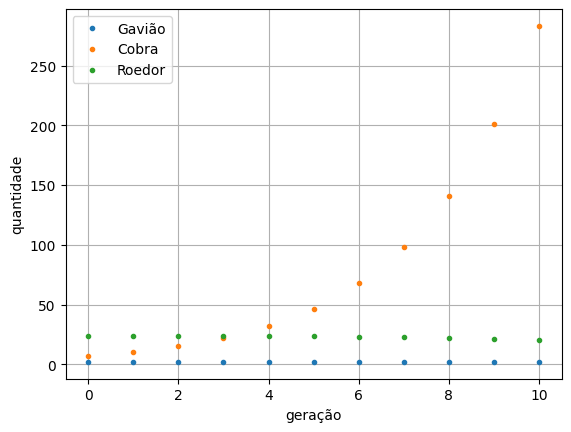

In [6]:
hawk=[2]
snake=[7.0]
rodent=[24]
generation=[0]

n = 10
for i in range(n):
  hawk.append(interaction(hawk[i],0.02,snake[i],1e-4,rodent[i],1.25e-5))
  snake.append(interaction(snake[i],0.012,hawk[i],-7.5e-3,rodent[i],2e-2))
  rodent.append(interaction(rodent[i],0.075,hawk[i],-0.5e-3,snake[i],-0.25e-3,75))
  generation.append(i+1)

plt.plot(generation,hawk,'o',ms=3,label="Gavião")
plt.plot(generation,snake,'o',ms=3,label="Cobra")
plt.plot(generation,rodent,'o',ms=3,label="Roedor")
plt.xlabel("geração")
plt.ylabel("quantidade")
plt.legend()
plt.grid()
plt.show()